In [4]:
import GetOldTweets3 as got
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [22]:
num_days = 3

dates = [datetime.date(day=18,month=1,year=2020) + datetime.timedelta(days=x+1) for x in range(num_days)]

all_tweets = pd.DataFrame()

for date in dates:
    tweetCriteria = got.manager.TweetCriteria().setQuerySearch('wuhan')\
                                               .setSince(str(date))\
                                               .setUntil(str(date+datetime.timedelta(days=1)))\
                                               .setMaxTweets(3000)
    tweets = got.manager.TweetManager.getTweets(tweetCriteria)

    store_tweets = pd.DataFrame(columns = ['username', 'to', 'text', 'date', 'retweets',
                                           'favorites','mentions', 'hashtags', 'geo'])

    for tweet in tweets:
        store_tweets.loc[tweet.id] = [tweet.username,tweet.to, tweet.text, 
                                      tweet.date, tweet.retweets, tweet.favorites, 
                                      tweet.mentions, tweet.hashtags, tweet.geo]
    print(date)
    print(all_tweets.shape)
    all_tweets = all_tweets.append(store_tweets)

2020-01-19
(0, 0)
2020-01-20
(1528, 9)
2020-01-21
(4528, 9)


In [23]:
all_tweets["newdate"] = all_tweets["date"].map(lambda x : (str(x.year) + "-" + str(x.month) + "-" + str(x.day)))
all_tweets["newdate"].value_counts()

2020-1-20    3000
2020-1-21    3000
2020-1-19    1528
Name: newdate, dtype: int64

In [24]:
all_tweets.to_csv('wuhan_tweets.csv')
all_tweets.head()

,username,to,text,date,retweets,favorites,mentions,hashtags,geo,newdate
1219046411330781185,HotaSusy,None,"Wuhan nCoV outbreak quadruples, spreads within...",2020-01-19 23:58:07+00:00,2,11,,,,2020-1-19
1219046262462304257,freemedia15,None,#wuhan #China 武汉肺炎确诊新增136例、死亡1例，广东、北京各确诊1例。 各位...,2020-01-19 23:57:32+00:00,0,1,,#wuhan #China,,2020-1-19
1219046089518530560,JmeDubya,None,20% + severely ill. Anyone want to have a very...,2020-01-19 23:56:51+00:00,0,0,,#Wuhan,,2020-1-19
1219046028222951424,getp2mask,None,Dr Sim calls for extra precaution in wake of S...,2020-01-19 23:56:36+00:00,0,0,,#WuhanPneumonia #Wuhan #china,,2020-1-19
1219045281372745731,fredwalton216,Rover829,Follow on tweet- “Reuters: The Wuhan Municipal...,2020-01-19 23:53:38+00:00,1,1,,,,2020-1-19


In [10]:
corona_tweets = pd.read_csv('corona_tweets_1.csv').append(pd.read_csv('corona_tweets_2.csv'))
corona_tweets = corona_tweets.rename({'Unnamed: 0':'tweet_id'}, axis=1)

corona_tweets.to_csv('corona_tweets_full.csv')

corona_tweets['date'] = pd.to_datetime(corona_tweets.date)
corona_tweets.head()

,tweet_id,username,to,text,date,retweets,favorites,mentions,hashtags,geo
0,1201617948319850499,CoronaVirus_exe,Lucioz7,"Vdd, tem que pôr o poste do presidiário no lug...",2019-12-02 21:43:38+00:00,0,0,NaN,NaN,NaN
1,1201616941124857862,CoronaVirus_exe,SenadoFederal,Que estupidez! Muito ajuda quem não atrapalha.,2019-12-02 21:39:38+00:00,0,18,NaN,NaN,NaN
2,1201603683265515521,LiminalWitch,NaN,Me preocupa que Terry está con diarrea otra ve...,2019-12-02 20:46:57+00:00,0,0,NaN,NaN,NaN
3,1201601611421945856,CoronaVirus_exe,groovytoria,Que fotos foda! sdds da época que eu andava tbm,2019-12-02 20:38:43+00:00,0,1,NaN,NaN,NaN
4,1201589439400681472,CoronaVirus_exe,Bela_e_Moral,"Porém, estará agredindo o olfato de outras pes...",2019-12-02 19:50:21+00:00,0,0,NaN,NaN,NaN


AttributeError: module 'matplotlib.pyplot' has no attribute 'xaxis'

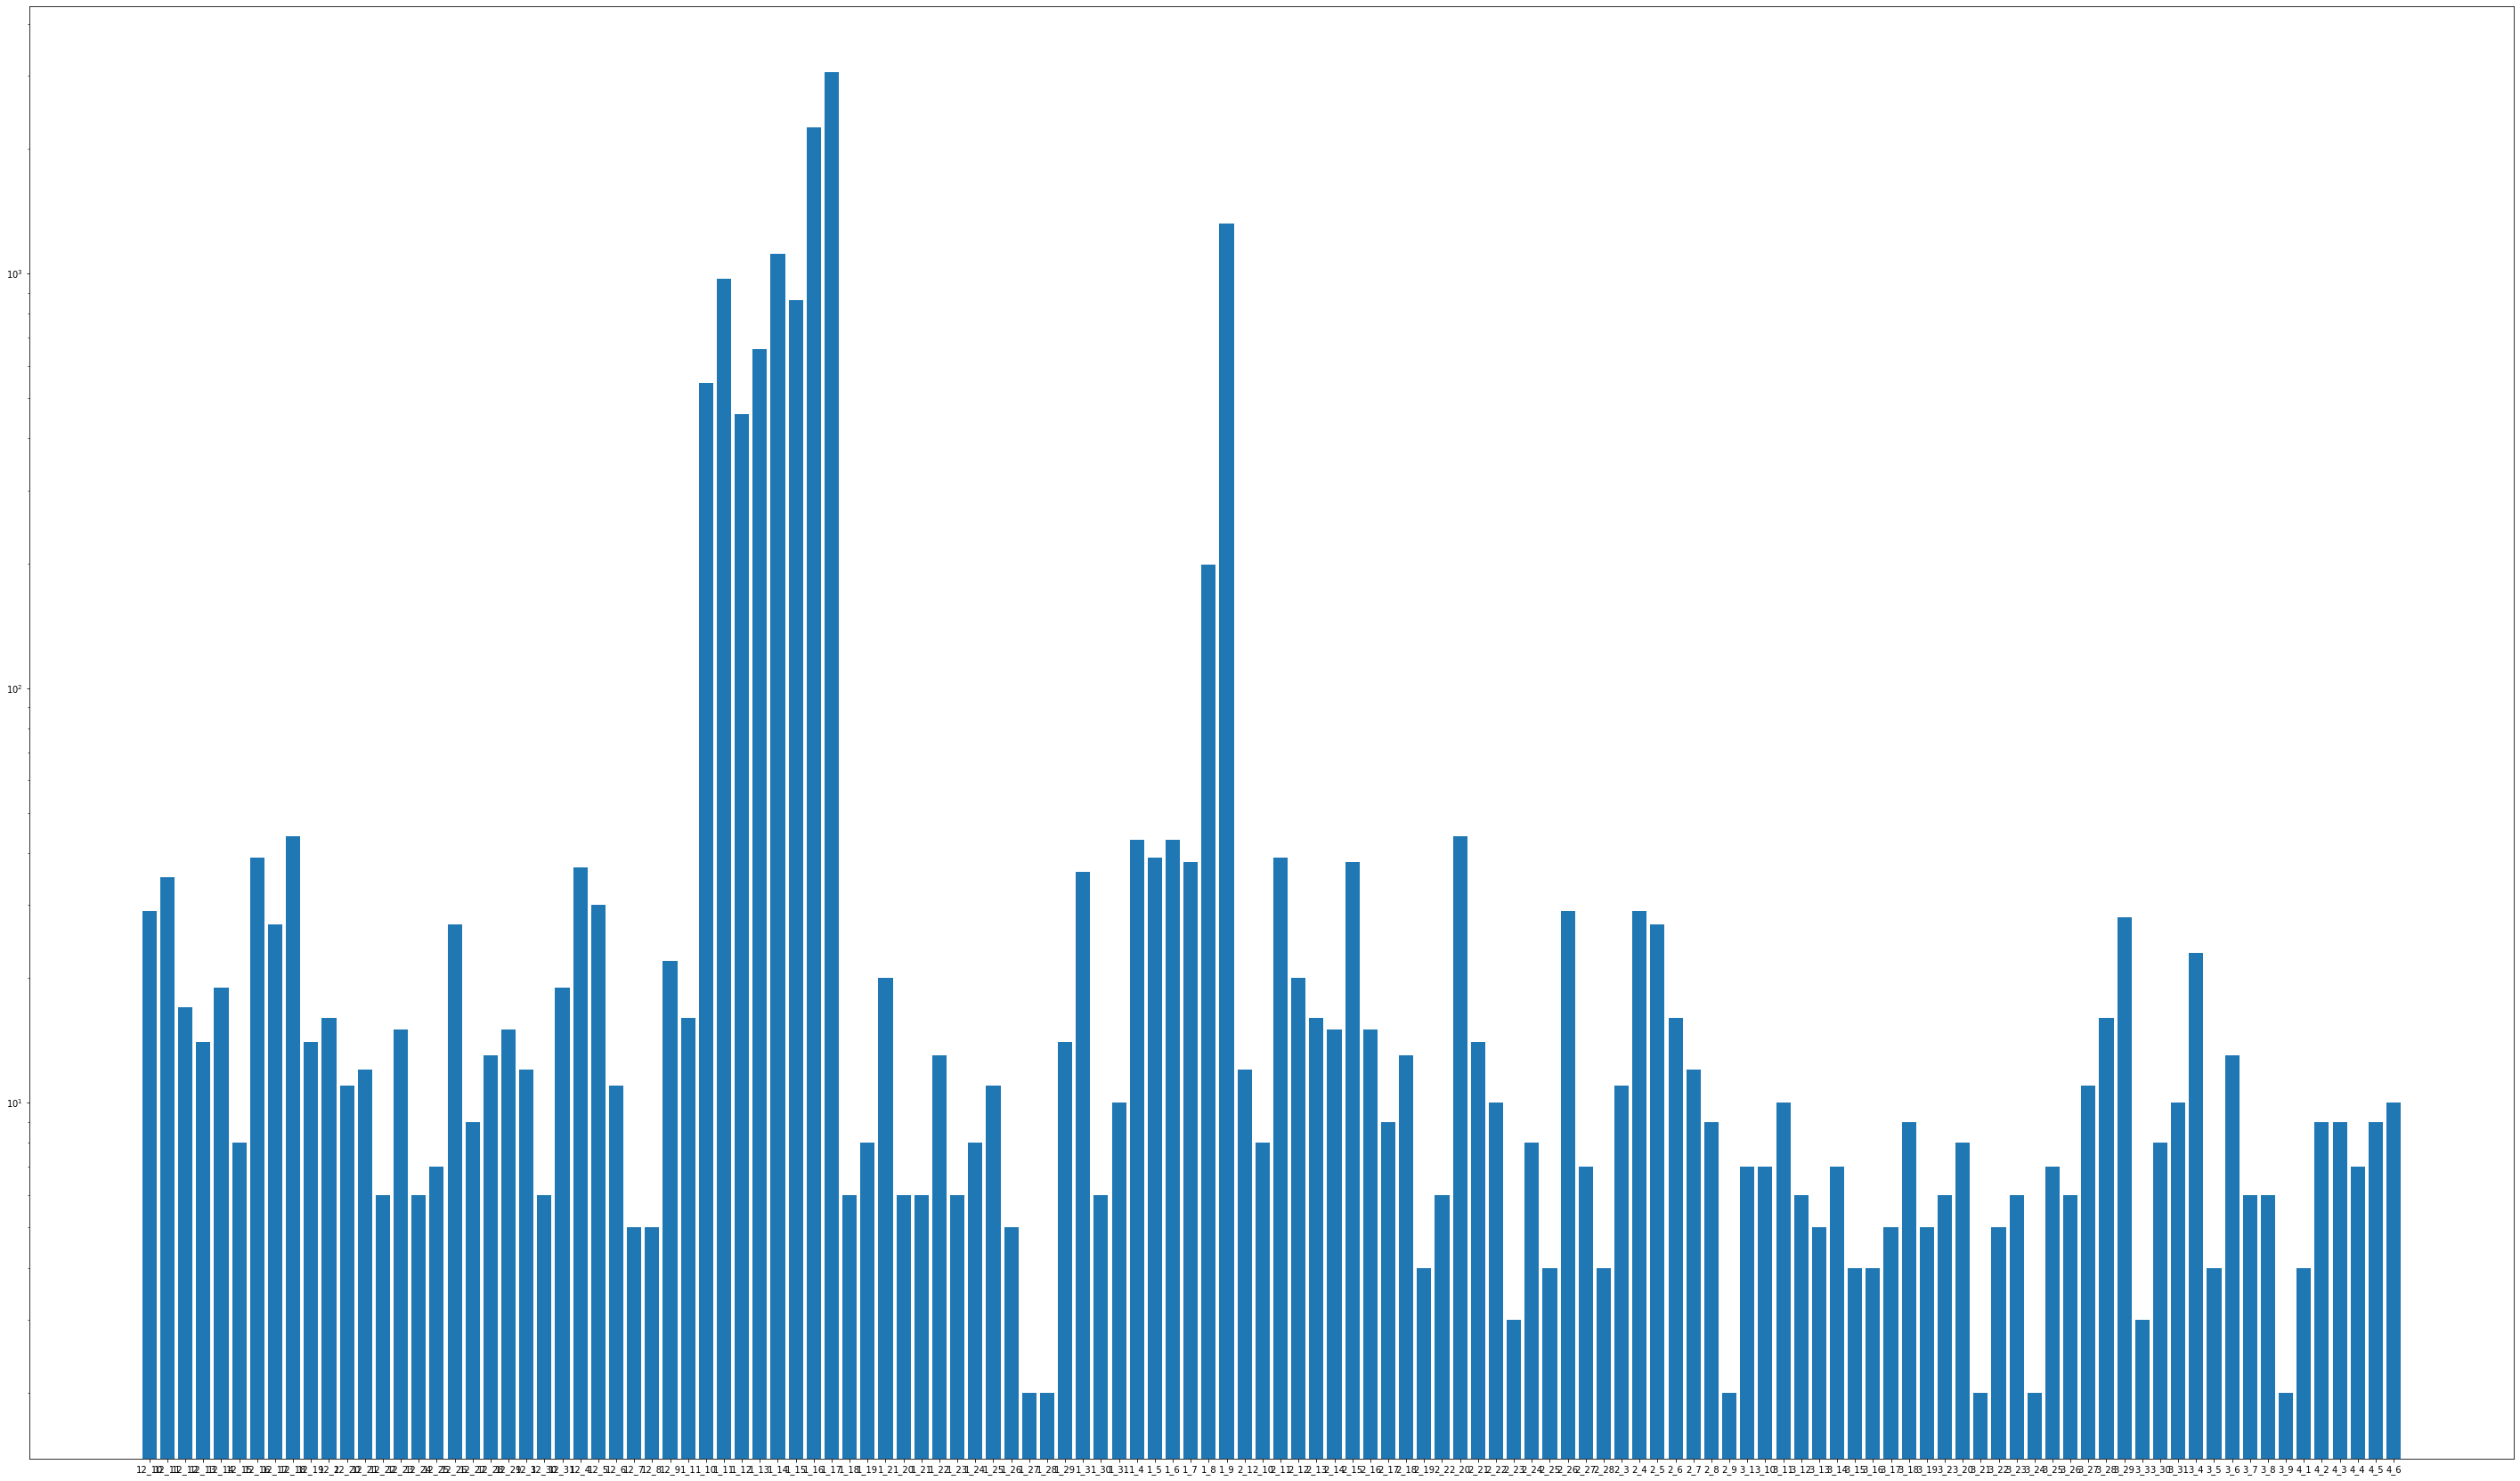

In [12]:
values = corona_tweets['date'].apply(lambda x: str(x.month) + '_' + str(x.day)).value_counts()
test = pd.Series(values.index,values.values).sort_values()
plt.figure(figsize=(50,30))
plt.bar(test.values,test.index,log=True)

n = 7  # Keeps every 7th label
[l.set_visible(False) for (i,l) in enumerate(plt.xaxis.get_ticklabels()) if i % n != 0]

In [15]:
pd.options.display.max_rows=1000
values

1_17     3058
1_16     2249
1_9      1318
1_14     1115
1_11      974
1_15      865
1_13      657
1_10      545
1_12      458
1_8       199
2_20       44
12_18      44
1_6        43
1_4        43
1_5        39
2_11       39
12_16      39
1_7        38
2_15       38
12_4       37
1_3        36
12_11      35
12_5       30
2_26       29
2_4        29
12_10      29
3_29       28
12_26      27
2_5        27
12_17      27
3_4        23
12_9       22
2_12       20
1_2        20
12_14      19
12_31      19
12_12      17
3_28       16
1_1        16
12_2       16
2_6        16
2_13       16
12_23      15
12_29      15
2_16       15
2_14       15
2_21       14
1_29       14
12_13      14
12_19      14
1_22       13
12_28      13
2_18       13
3_6        13
12_21      12
12_3       12
2_1        12
2_7        12
3_27       11
2_3        11
12_20      11
1_25       11
12_6       11
4_6        10
2_22       10
1_31       10
3_11       10
3_31       10
2_17        9
2_8         9
12_27       9
4_3   

In [19]:
import pandas as pd

import tweepy
from tweepy import Stream
from tweepy import StreamListener 
from tweepy import OAuthHandler
import json
consumer_key = "YOUR CONSUMER KEY"
consumer_secret = "YOUR CONSUMER SECRET"
access_token = "YOUR ACCESS TOKEN"
access_secret = "YOUR ACCESS SECRET"
 
auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)
 
api = tweepy.API(auth)
@classmethod
def parse(cls, api, raw):
    status = cls.first_parse(api, raw)
    setattr(status, 'json', json.dumps(raw))
    return status
 
# Status() is the data model for a tweet
tweepy.models.Status.first_parse = tweepy.models.Status.parse
tweepy.models.Status.parse = parse
class MyListener(StreamListener):
 
    def on_data(self, data):
        try:
            with open('FILENAME.json', 'a') as f:
                f.write(data)
                return True
        except BaseException as e:
            print("Error on_data: %s" % str(e))
        return True
 
    def on_error(self, status):
        print(status)
        return True
 
#Set the hashtag to be searched
twitter_stream = Stream(auth, MyListener())
twitter_stream.filter(track=['#coronavirus'])

401


KeyboardInterrupt: 